# NBA Analysis
### In this Jupyter notebook, we will be analyzing a dataset containing data on NBA players, teams, and games. The dataset consists of 10 CSV files, and we will be starting our analysis with the all_seasons.csv file.

### The data contained in this file has been cleaned and prepared using SQL, and we will be using it to explore how NBA strategies and player performance have changed over the years.

### Throughout this notebook, we will be performing exploratory data analysis to uncover new insights and patterns in the data. Let's get started!

In [1]:
from audioop import max

#Import libraries and Reading the csv file
#Import Matplotlib to explore the data by visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

all_seasons_df = pd.read_csv("Data/nba/all_seasons.csv")
teams_df = pd.read_csv("Data/nba/teams.csv")

In [2]:
all_seasons_df.info

<bound method DataFrame.info of              player_name team_abbreviation  age  player_height  player_weight  \
0          Dennis Rodman               CHI   36         198.12      99.790240   
1      Dwayne Schintzius               LAC   28         215.90     117.933920   
2           Earl Cureton               TOR   39         205.74      95.254320   
3            Ed O'Bannon               DAL   24         203.20     100.697424   
4            Ed Pinckney               MIA   34         205.74     108.862080   
...                  ...               ...  ...            ...            ...   
12300    Markieff Morris               MIA   32         205.74     111.130040   
12301     Markelle Fultz               ORL   24         193.04      94.800728   
12302       Marcus Smart               BOS   28         193.04      99.790240   
12303     Marcus Garrett               MIA   23         195.58      92.986360   
12304       Micah Potter               DET   24         208.28     112.490816

In [47]:
all_seasons_df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [48]:
#preview the first 5 rows of the file
print(all_seasons_df.head(5))

         player_name team_abbreviation  age  player_height  player_weight  \
0      Dennis Rodman               CHI   36         198.12      99.790240   
1  Dwayne Schintzius               LAC   28         215.90     117.933920   
2       Earl Cureton               TOR   39         205.74      95.254320   
3        Ed O'Bannon               DAL   24         203.20     100.697424   
4        Ed Pinckney               MIA   34         205.74     108.862080   

                       college country draft_year draft_round draft_number  \
0  Southeastern Oklahoma State     USA       1986           2           27   
1                      Florida     USA       1990           1           24   
2                Detroit Mercy     USA       1979           3           58   
3                         UCLA     USA       1995           1            9   
4                    Villanova     USA       1985           1           10   

   ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_

In [49]:
#Preview columns names
print(all_seasons_df.columns)

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')


In [50]:
#Now preview datatypes of each column to see if there is any wrong datatypes
print(all_seasons_df.dtypes)

player_name           object
team_abbreviation     object
age                    int64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object


In [51]:
#Print statistical info o f the dataframe
all_seasons_df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [52]:
#Drop duplicate values and count number of players
all_seasons_df['player_name'].unique()

array(['Dennis Rodman', 'Dwayne Schintzius', 'Earl Cureton', ...,
       'Marko Simonovic', 'Marcus Garrett', 'Micah Potter'], dtype=object)

The number of players that have played in the NBA since 1996 is 2463

In [53]:
all_seasons_df.corr()

C:\Users\abdal\AppData\Local\Temp\ipykernel_6240\1398897219.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_seasons_df.corr()


,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.008954,0.058544,0.055218,0.008118,0.035623,0.090209,0.091746,-0.057147,0.018330,-0.119416,0.025175,0.066766
player_height,-0.008954,1.000000,0.825421,0.002202,-0.056564,0.423275,-0.449033,-0.002877,0.589485,0.614963,-0.104714,0.072154,-0.614631
player_weight,0.058544,0.825421,1.000000,0.019652,-0.026664,0.437930,-0.378784,0.004043,0.600643,0.607045,-0.067385,0.068142,-0.529440
gp,0.055218,0.002202,0.019652,1.000000,0.539066,0.470948,0.385836,0.253262,-0.016396,0.067266,0.146806,0.375816,0.133982
pts,0.008118,-0.056564,-0.026664,0.539066,1.000000,0.624889,0.660949,0.218366,-0.123674,0.054804,0.638853,0.376571,0.332815
reb,0.035623,0.423275,0.437930,0.470948,0.624889,1.000000,0.241018,0.190940,0.407976,0.612226,0.230552,0.314569,-0.069771
ast,0.090209,-0.449033,-0.378784,0.385836,0.660949,0.241018,1.000000,0.165098,-0.340600,-0.198130,0.392533,0.176083,0.802527
net_rating,0.091746,-0.002877,0.004043,0.253262,0.218366,0.190940,0.165098,1.000000,0.060166,0.051433,0.018866,0.316474,0.066176
oreb_pct,-0.057147,0.589485,0.600643,-0.016396,-0.123674,0.407976,-0.340600,0.060166,1.000000,0.556096,-0.099069,0.061805,-0.428527
dreb_pct,0.018330,0.614963,0.607045,0.067266,0.054804,0.612226,-0.198130,0.051433,0.556096,1.000000,-0.012817,0.107036,-0.325083


C:\Users\abdal\AppData\Local\Temp\ipykernel_6240\609230777.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = all_seasons_df.corr()


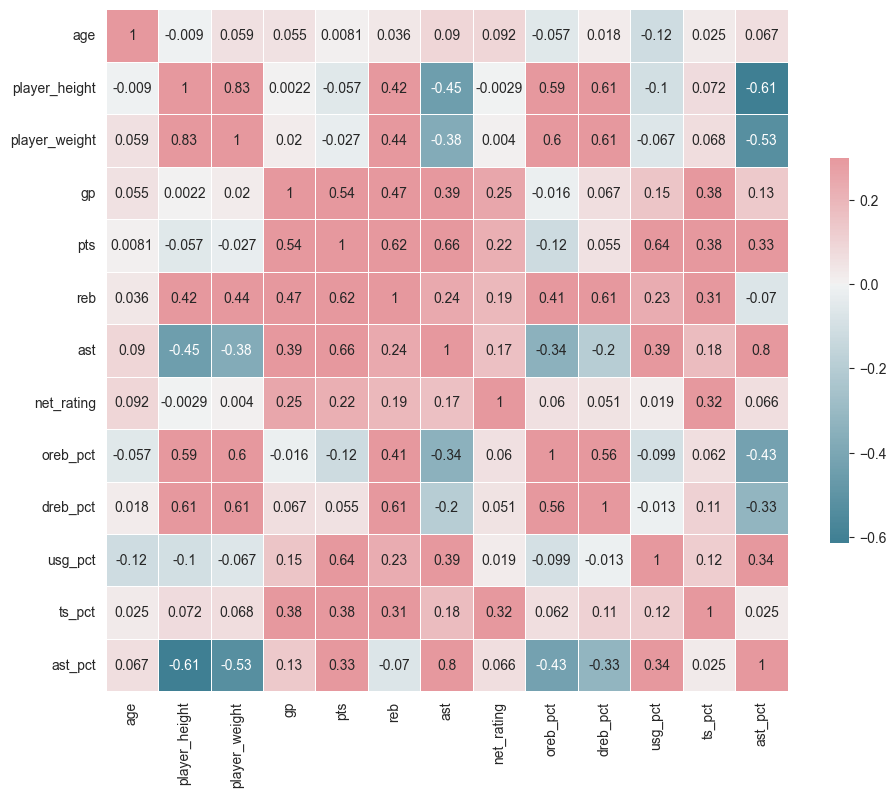

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = all_seasons_df.corr()

# Draw the heatmap with the mask and correct aspect ratio and generate a custom diverging colormap
f, ax = plt.subplots(figsize=(11, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### From the above information, we can understand a few things about the data in the all_seasons table:

1. There are a total of 12,305 rows in the table. Each row represents a player's performance in a particular season.

2. The age, player_height, and player_weight columns contain numerical values representing the age, height, and weight of the player, respectively. The count row shows that there are no missing values in these columns.

3. The gp, pts, reb, and ast columns contain numerical values representing the number of games played, points scored, rebounds made, and assists made by the player in a particular season. The count row shows that there are no missing values in these columns.

4. The net_rating column contains numerical values representing the net rating of the player in a particular season. The count row shows that there are no missing values in this column.

5. The oreb_pct, dreb_pct, usg_pct, ts_pct, and ast_pct columns contain numerical values representing various statistical percentages for the player in a particular season. The count row shows that there are no missing values in these columns.

6. The mean value for the age column is 27.08, which indicates that the average age of players in the dataset is 27.08. The average player height is 200.6 cm and the average player weight is 100.37 lbs. Also, The tallest player since 1996 is 231 cm.

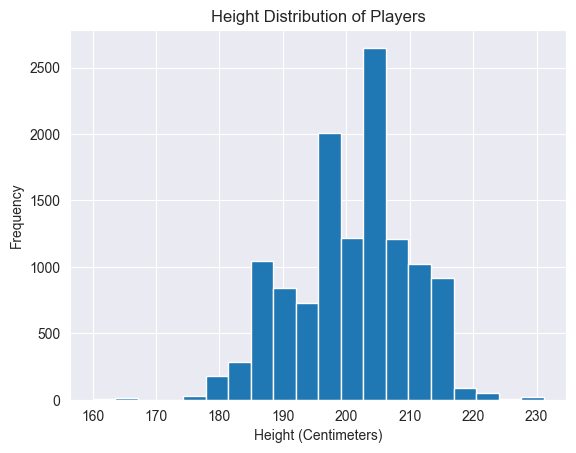

In [55]:
# extract the player_height column from the DataFrame to see height distribution
heights = all_seasons_df['player_height']

# create a histogram of the player heights
plt.hist(heights, bins = 20)
plt.xlabel("Height (Centimeters)")
plt.ylabel("Frequency")
plt.title("Height Distribution of Players")
plt.show()

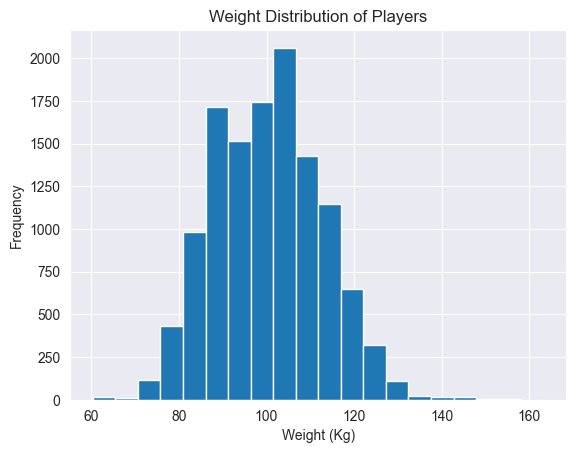

In [56]:
# extract the player_height column from the DataFrame to see Weight distribution
heights = all_seasons_df['player_weight']

# create a histogram of the player heights
plt.hist(heights, bins = 20)
plt.xlabel("Weight (Kg)")
plt.ylabel("Frequency")
plt.title("Weight Distribution of Players")
plt.show()

In [57]:
# Sort the DataFrame by ts_PCT in descending order
all_seasons_df.sort_values(by='pts', ascending=False, inplace=True)

# View the top 10 players
top_10 = all_seasons_df[['player_name','pts',]].head(10)
print(top_10)

             player_name   pts
10572       James Harden  36.1
4342         Kobe Bryant  35.4
11041       James Harden  34.3
4124       Allen Iverson  33.0
2953       Tracy McGrady  32.1
7928        Kevin Durant  32.0
11335      Stephen Curry  32.0
4703         Kobe Bryant  31.6
9143   Russell Westbrook  31.6
4323        LeBron James  31.4


In [58]:
# Sort the DataFrame by ts_PCT in descending order
all_seasons_df.sort_values(by='ast', ascending=False, inplace=True)

# View the top 10 players
top_10 = all_seasons_df[['player_name','ast']].head(10)
print(top_10)

             player_name   ast
11433  Russell Westbrook  11.7
8787         Rajon Rondo  11.7
6896         Rajon Rondo  11.7
4772          Steve Nash  11.6
5049          Chris Paul  11.6
3577          Steve Nash  11.5
430         Mark Jackson  11.4
6357          Steve Nash  11.4
9465        James Harden  11.2
6609         Rajon Rondo  11.2


In [59]:
# Sort the DataFrame by ts_PCT in descending order
all_seasons_df.sort_values(by='reb', ascending=False, inplace=True)

# View the top 10 players
top_10 = all_seasons_df[['player_name','reb']].head(10)
print(top_10)

          player_name   reb
1791    Danny Fortson  16.3
0       Dennis Rodman  16.1
9825   Andre Drummond  16.0
10203  Andre Drummond  15.6
2741      Ben Wallace  15.4
10976  Andre Drummond  15.2
6462       Kevin Love  15.2
9665   DeAndre Jordan  15.2
8536   DeAndre Jordan  15.0
728     Dennis Rodman  15.0


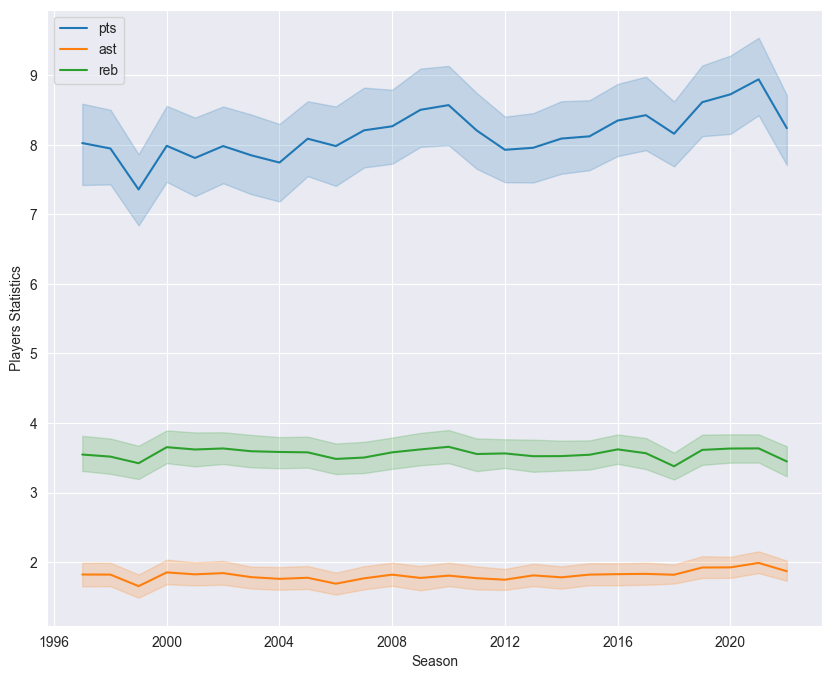

In [60]:
# Convert the 'season' column to a DateTime data type
all_seasons_df['season'] = all_seasons_df['season'].astype(str)
all_seasons_df['season'] = pd.to_datetime(all_seasons_df['season'], format='%Y-%y')

# Loop through each column and plot a line plot
plt.figure(figsize=(10, 8))
plt.xlabel('Season')
plt.ylabel('Players Statistics')
for column in ['pts', 'ast', 'reb']:
    sns.lineplot(data=all_seasons_df, x='season', y=column, label=column)

plt.show()

In [61]:

# Group the data by team, season, and player position
team_stats = all_seasons_df.groupby(['team_abbreviation', 'season'])

# Compute the mean for each numeric column for each group
team_stats_mean = team_stats.mean()

# Display the resulting data frame
print(team_stats_mean)

                                    age  player_height  player_weight  \
team_abbreviation season                                                
ATL               1997-01-01  27.529412     203.797647     103.098793   
                  1998-01-01  28.250000     199.231250      99.166551   
                  1999-01-01  28.500000     199.571429     100.470628   
                  2000-01-01  26.692308     201.246154     100.662532   
                  2001-01-01  26.187500     200.025000      97.890823   
...                                 ...            ...            ...   
WAS               2018-01-01  27.600000     201.168000      97.945633   
                  2019-01-01  26.894737     201.328421      99.933480   
                  2020-01-01  25.619048     197.878095      96.723094   
                  2021-01-01  26.000000     200.095556      97.749076   
                  2022-01-01  25.652174     198.009565      96.753146   

                                     gp       pts 

C:\Users\abdal\AppData\Local\Temp\ipykernel_6240\4246523350.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_stats_mean = team_stats.mean()


In [62]:
# Group the data by draft year
draft_stats = all_seasons_df.groupby(['draft_year'])

# Compute the mean for each numeric column for each group
draft_stats_mean = draft_stats.mean()

# Display the resulting data frame
print(draft_stats_mean)

                  age  player_height  player_weight         gp        pts  \
draft_year                                                                  
1963        24.000000     187.960000      86.182480   5.000000   1.400000   
1976        43.000000     215.900000     110.676448  43.000000   3.700000   
1978        40.000000     195.580000      90.718400  32.000000   4.000000   
1979        40.000000     205.740000      96.766293  15.000000   0.566667   
1980        39.000000     208.280000     117.933920  32.333333   1.900000   
1981        38.750000     207.486250     107.926547  32.937500   3.856250   
1982        36.545455     201.352727     102.800441  40.545455   6.836364   
1983        36.500000     200.890909     100.697424  50.909091   6.786364   
1984        37.244898     203.822041     106.214584  61.122449  10.606122   
1985        35.546512     203.495349     105.228070  56.174419   8.723256   
1986        34.884615     201.343846     100.191494  50.826923   6.959615   

C:\Users\abdal\AppData\Local\Temp\ipykernel_6240\3026176825.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  draft_stats_mean = draft_stats.mean()


In [63]:
games_dt_df = pd.read_csv("Data/nba/games_details.csv")
games_dt_df

C:\Users\abdal\AppData\Local\Temp\ipykernel_6240\1958437541.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_dt_df = pd.read_csv("Data/nba/games_details.csv")


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,Played,36:22,...,0,8,8,5,3,1,1,1,15,5
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,Played,23:54,...,2,4,6,0,0,2,2,6,14,10
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,Played,25:17,...,1,9,10,0,0,0,3,4,15,14
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,Played,30:52,...,0,3,3,1,1,0,1,4,12,20
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,Played,33:46,...,0,6,6,9,1,0,5,0,14,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,Bench,Played,19,...,0,2,2,0,2,0,1,3,17,0
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,Bench,Played,23,...,1,0,1,1,1,0,3,3,18,0
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,Bench,Played,15,...,3,5,8,0,1,0,0,3,6,0
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,Bench,Played,19,...,1,2,3,1,0,0,4,2,2,0


In [64]:
# Get the highest points scored by a player
games_sorted = games_dt_df.sort_values('PTS', ascending=False)
top_row = games_sorted.head(1)
player_name = top_row['PLAYER_NAME'].values[0]
print(player_name,games_dt_df['PTS'].max())

Kobe Bryant 81


In [65]:
# Get the highest assists scored by a player
games_sorted = games_dt_df.sort_values('AST', ascending=False)
top_row = games_sorted.head(1)
player_name = top_row['PLAYER_NAME'].values[0]
print(player_name,games_dt_df['AST'].max())

Rajon Rondo 25


In [66]:
# Get the highest rebounds scored by a player
games_sorted = games_dt_df.sort_values('REB', ascending=False)
top_row = games_sorted.head(1)
player_name = top_row['PLAYER_NAME'].values[0]
print(player_name,games_dt_df['REB'].max())

Kevin Love 31


In [67]:
# Get the highest blocks scored by a player
games_sorted = games_dt_df.sort_values('BLK', ascending=False)
top_row = games_sorted.head(1)
player_name = top_row['PLAYER_NAME'].values[0]
print(player_name,games_dt_df['BLK'].max())

JaVale McGee 12


In [68]:
# players who scored 20 or more points ,and 10 ast or more ,and 10 reb or 10 blocks or more
triple_double_df = games_dt_df.loc[(games_dt_df['PTS'] >= 20) & (games_dt_df['AST'] >= 10) & ((games_dt_df['REB'] >= 10) | (games_dt_df['BLK'] >= 10)), ['PLAYER_NAME', 'PTS', 'AST', 'BLK', 'REB']]

triple_double_df.head(10)

,PLAYER_NAME,PTS,AST,BLK,REB
568,LeBron James,23,12,4,14
1071,Nikola Jokic,32,13,1,15
1269,Nikola Jokic,46,11,4,12
2396,James Harden,29,16,0,10
2846,Dejounte Murray,31,14,0,13
3793,Josh Giddey,28,12,0,11
3803,Julius Randle,30,10,0,13
4130,Joel Embiid,40,10,0,14
4286,Terry Rozier,25,11,0,10
4360,Dejounte Murray,32,15,0,10


In [69]:
#How many times a player got a triple double
triple_double_df[['PLAYER_NAME']].value_counts()

PLAYER_NAME      
Russell Westbrook    141
LeBron James         118
James Harden          64
Nikola Jokic          56
Luka Doncic           42
                    ... 
Isaiah Thomas          1
Hedo Turkoglu          1
Greivis Vasquez        1
Greg Monroe            1
Zach Randolph          1
Length: 115, dtype: int64

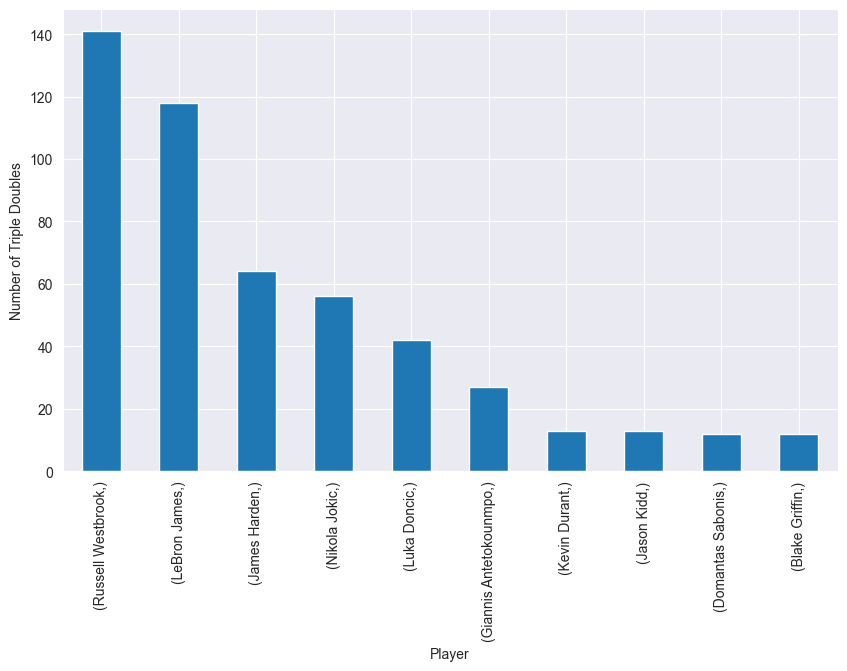

In [70]:
player_counts = triple_double_df[['PLAYER_NAME']].value_counts().head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
player_counts.plot.bar()
plt.xlabel('Player')
plt.ylabel('Number of Triple Doubles')
plt.show()

In [71]:
games_df = pd.read_csv('Data/nba/games.csv')
ranking_df = pd.read_csv('Data/nba/ranking.csv')
games_df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home',
       'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away',
       'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [72]:
games_dt_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

In [73]:
ranking_df.columns

Index(['TEAM_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE', 'TEAM', 'G', 'W',
       'L', 'W_PCT', 'HOME_WINS', 'ROAD_WINS', 'HOME_LOSS', 'ROAD_LOSS'],
      dtype='object')

In [74]:
# Group the data by player and calculate player-level statistics
player_stats = games_dt_df.groupby(['PLAYER_ID','TEAM_ABBREVIATION','PLAYER_NAME']).agg({
    'PTS': ['mean', 'max', 'min'],
    'FG_PCT': ['mean', 'max', 'min'],
    'FG3_PCT': ['mean', 'max', 'min'],
    'REB': ['mean', 'max', 'min'],
    'AST': ['mean', 'max', 'min'],
    'STL': ['mean', 'max', 'min'],
})

# Reset the index of the DataFrame to make PLAYER_ID a column again
player_stats.reset_index(inplace=True)
top_10 = player_stats.sort_values(('PTS','mean'),ascending=False)
top_10

PLAYER_ID TEAM_ABBREVIATION    PLAYER_NAME        PTS          \
                                                        mean max min   
3564      201935               HOU   James Harden  28.093264  61   0   
2935      201142               OKC   Kevin Durant  27.515021  54   0   
3585      201942               CHI  DeMar DeRozan  27.388060  45  12   
4833      203468               NOP    CJ McCollum  27.083333  38  15   
1594        2544               CLE   LeBron James  26.412313  57   0   
...          ...               ...            ...        ...  ..  ..   
5396      204064               HOU  Akil Mitchell   0.000000   0   0   
5400      204066               BOS   John Holland   0.000000   0   0   
5403      204067               BOS   Jarell Eddie   0.000000   0   0   
5413      204078               DAL   Yuki Togashi   0.000000   0   0   
7084  1962937827               SAC      Matt Matt   0.000000   0   0   

        FG_PCT                 FG3_PCT  ...            REB               AST  \
          mean    max    min      mean  ...  min      mean max min      mean   
3564  0.426159  0.813  0.000  0.347718  ...  0.0  5.715026  17   0  7.348446   
2935  0.483843  0.833  0.000  0.381104  ...  0.0  7.276109  19   0  3.745351   
3585  0.500746  0.750  0.308  0.291299  ...  0.0  5.343284  12   0  4.970149   
4833  0.530917  0.692  0.286  0.381917  ...  0.0  5.583333  11   2  6.666667   
1594  0.477068  0.875  0.000  0.284673  ...  0.0  7.214552  19   0  7.076493   
...        ...    ...    ...       ...  ...  ...       ...  ..  ..       ...   
5396  0.000000  0.000  0.000  0.000000  ...  0.0  0.000000   0   0  0.000000   
5400  0.000000  0.000  0.000  0.000000  ...  0.0  0.000000   0   0  0.000000   
5403  0.000000  0.000  0.000  0.000000  ...  0.0  0.250000   1   0  0.000000   
5413  0.000000  0.000  0.000  0.000000  ...  0.0  0.000000   0   0  0.000000   
7084  0.000000  0.000  0.000  0.000000  ...  0.0  0.000000   0   0  0.000000   

                   STL          
     max min      mean max min  
3564  17   0  1.705959   8   0  
2935  12   0  1.210300   5   0  
3585  10   1  0.895522   3   0  
4833  11   4  1.083333   2   0  
1594  19   0  1.587687   7   0  
...   ..  ..       ...  ..  ..  
5396   0   0  0.000000   0   0  
5400   0   0  0.000000   0   0  
5403   0   0  0.250000   1   0  
5413   0   0  0.000000   0   0  
7084   0   0  0.000000   0   0  

[7085 rows x 21 columns]

<Figure size 1000x1000 with 0 Axes>

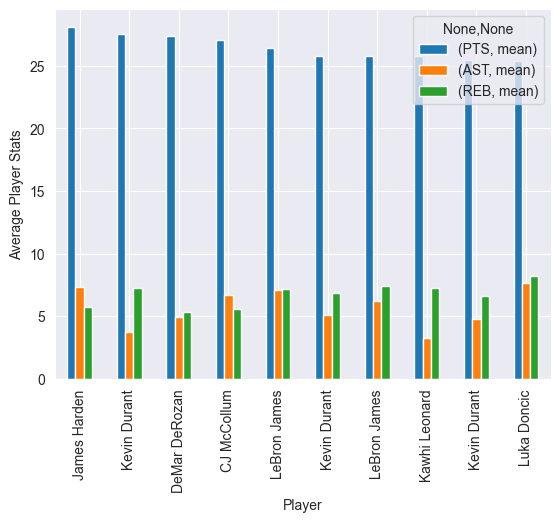

In [75]:
#Plot the bar chart
top_10 = top_10.head(10)
plt.figure(figsize=(10, 10))
columns = [('PTS','mean'),('AST','mean'),('REB','mean')]
top_10.plot.bar(x='PLAYER_NAME', y=columns)
plt.xlabel('Player')
plt.ylabel('Average Player Stats')
plt.show()

<Figure size 1000x1000 with 0 Axes>

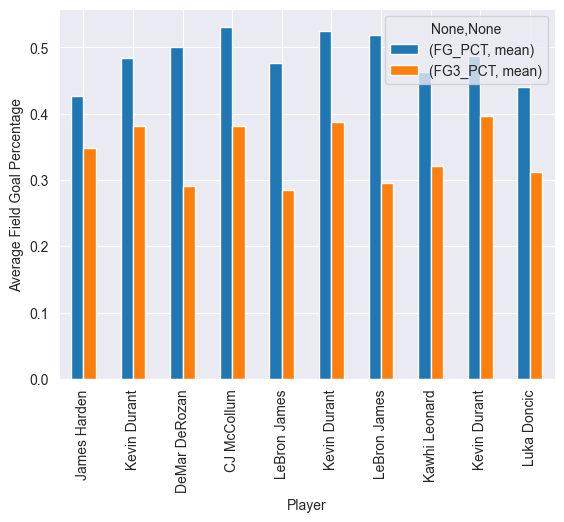

In [76]:
#Plot the bar chart
plt.figure(figsize=(10, 10))
columns = [('FG_PCT','mean'),('FG3_PCT','mean')]
top_10.plot.bar(x='PLAYER_NAME', y=columns)
plt.xlabel('Player')
plt.ylabel('Average Field Goal Percentage')
plt.show()

#
#
# Teams Stats analysis

To analyze how the statistics have changed in the years 1999-00, 2010-11, and 2021-22, we could filter the data to only include rows where the 'SEASON' column is equal to the corresponding year, and then compare the mean, max, and min values for each statistic between the different years. For example, we could calculate the mean points per game for the home team in 1999-00, and then compare it to the mean points per game for the home team in 2010-11 and 2021-22. This would give us an idea of how the scoring has changed over time. We could also repeat this process for other statistics such as field goal percentage and rebounds, to get a complete picture of how the game has evolved.

In [77]:
#merge the two dataframes for home team name
games_df = pd.merge(games_df, teams_df, left_on='TEAM_ID_home', right_on='TEAM_ID', how='left')
games_df = games_df.drop(columns=['TEAM_ID','ARENA','ABBREVIATION','LEAGUE_ID','ARENACAPACITY','MAX_YEAR','MIN_YEAR','OWNER','CITY','GENERALMANAGER','HEADCOACH','DLEAGUEAFFILIATION','YEARFOUNDED'])
games_df.rename(columns={'NICKNAME': 'home_team_name'}, inplace=True)

#merge the two dataframes for away team name
games_df = pd.merge(games_df, teams_df, left_on='TEAM_ID_away', right_on='TEAM_ID', how='left')
games_df = games_df.drop(columns=['TEAM_ID','ARENA','ABBREVIATION','LEAGUE_ID','ARENACAPACITY','MAX_YEAR','MIN_YEAR','OWNER','CITY','GENERALMANAGER','HEADCOACH','DLEAGUEAFFILIATION','YEARFOUNDED'])
games_df.rename(columns={'NICKNAME': 'away_team_name'}, inplace=True)

games_df

,GAME_DATE_EST,GAME_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,home_team_name,away_team_name
0,2022-03-12,22101005,2021,1610612748,104.0,0.398,0.760,0.333,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0,Heat,Timberwolves
1,2022-03-12,22101006,2021,1610612741,101.0,0.443,0.933,0.429,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1,Bulls,Cavaliers
2,2022-03-12,22101007,2021,1610612759,108.0,0.412,0.813,0.324,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0,Spurs,Pacers
3,2022-03-12,22101008,2021,1610612744,122.0,0.484,0.933,0.400,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1,Warriors,Bucks
4,2022-03-12,22101009,2021,1610612743,115.0,0.551,0.750,0.407,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0,Nuggets,Raptors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,2014,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1,Hawks,Pelicans
25792,2014-10-06,11400004,2014,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0,Bulls,Wizards
25793,2014-10-06,11400005,2014,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1,Lakers,Nuggets
25794,2014-10-05,11400002,2014,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1,Raptors,Kings


In [78]:
# Group the data by team and season and calculate team-level statistics
team_stats_home = games_df.groupby(['TEAM_ID_home', 'SEASON']).agg({
    'home_team_name': [],
    'PTS_home': ['mean', 'max', 'min'],
    'FG_PCT_home': ['mean', 'max', 'min'],
    'FG3_PCT_home': ['mean', 'max', 'min'],
    'REB_home': ['mean', 'max', 'min'],
    'AST_home': ['mean', 'max', 'min'],
})

# Reset the index of the DataFrame to make TEAM_ID_home and SEASON columns again
team_stats_home.reset_index(inplace=True)

team_stats_home.head(20)

TEAM_ID_home SEASON    PTS_home              FG_PCT_home                \
                              mean    max   min        mean    max    min   
0    1610612737   2003   95.785714  138.0  75.0    0.438500  0.588  0.350   
1    1610612737   2004   93.595238  114.0  68.0    0.445476  0.551  0.325   
2    1610612737   2005   99.409091  122.0  74.0    0.466795  0.632  0.341   
3    1610612737   2006   96.622222  118.0  75.0    0.449444  0.603  0.295   
4    1610612737   2007  101.645833  127.0  75.0    0.467958  0.597  0.338   
5    1610612737   2008   97.440000  129.0  74.0    0.465500  0.589  0.315   
6    1610612737   2009  103.060000  146.0  75.0    0.471000  0.630  0.349   
7    1610612737   2010   93.860000  116.0  59.0    0.459440  0.630  0.291   
8    1610612737   2011   97.621622  139.0  76.0    0.451027  0.566  0.337   
9    1610612737   2012   98.702128  126.0  73.0    0.464128  0.577  0.333   
10   1610612737   2013   99.659574  124.0  76.0    0.446447  0.585  0.346   
11   1610612737   2014  102.192308  131.0  77.0    0.465788  0.602  0.330   
12   1610612737   2015  102.612245  127.0  78.0    0.462490  0.615  0.367   
13   1610612737   2016  105.489362  142.0  84.0    0.457723  0.563  0.347   
14   1610612737   2017  104.395349  126.0  78.0    0.453465  0.633  0.347   
15   1610612737   2018  116.116279  161.0  85.0    0.457419  0.622  0.321   
16   1610612737   2019  113.694444  152.0  86.0    0.456250  0.581  0.323   
17   1610612737   2020  113.760870  135.0  91.0    0.469500  0.631  0.327   
18   1610612737   2021  115.114286  134.0  90.0    0.482886  0.583  0.355   
19   1610612738   2003   95.113636  137.0  68.0    0.443000  0.577  0.293   

   FG3_PCT_home                 REB_home               AST_home              
           mean    max    min       mean   max   min       mean   max   min  
0      0.337000  0.680  0.000  44.380952  56.0  34.0  20.238095  30.0  12.0  
1      0.318810  0.625  0.091  42.952381  56.0  29.0  20.119048  29.0  15.0  
2      0.361136  0.750  0.000  40.590909  50.0  29.0  20.386364  29.0  10.0  
3      0.312111  0.500  0.000  40.755556  52.0  31.0  20.511111  32.0  13.0  
4      0.327083  0.692  0.000  42.666667  56.0  27.0  24.312500  35.0  15.0  
5      0.360740  0.600  0.150  39.760000  58.0  23.0  21.860000  35.0  11.0  
6      0.363820  0.647  0.174  42.860000  55.0  30.0  23.940000  37.0   9.0  
7      0.341260  0.833  0.091  38.560000  52.0  25.0  22.880000  34.0  11.0  
8      0.367703  0.750  0.154  42.675676  64.0  31.0  22.594595  32.0  14.0  
9      0.368021  0.625  0.158  41.702128  52.0  28.0  24.468085  35.0  12.0  
10     0.349447  0.600  0.154  40.680851  52.0  28.0  25.106383  38.0  14.0  
11     0.368635  0.556  0.160  41.557692  54.0  29.0  26.365385  42.0  15.0  
12     0.356510  0.515  0.156  42.367347  53.0  25.0  26.632653  37.0  20.0  
13     0.337617  0.500  0.105  44.382979  64.0  30.0  24.702128  36.0  14.0  
14     0.365209  0.515  0.222  41.651163  59.0  29.0  25.325581  40.0  16.0  
15     0.347023  0.486  0.171  47.255814  65.0  33.0  26.837209  36.0  17.0  
16     0.342694  0.488  0.200  44.722222  63.0  32.0  24.472222  34.0  18.0  
17     0.378783  0.645  0.175  46.826087  65.0  35.0  24.413043  35.0  15.0  
18     0.382486  0.515  0.243  43.828571  55.0  31.0  25.428571  36.0  18.0  
19     0.343091  0.625  0.095  41.840909  59.0  27.0  20.613636  30.0  13.0

In [79]:
# Group the data by team and season and calculate team-level statistics

team_stats_away = games_df.groupby(['TEAM_ID_away', 'SEASON']).agg({
    'PTS_away': ['mean', 'max', 'min'],
    'FG_PCT_away': ['mean', 'max', 'min'],
    'FG3_PCT_away': ['mean', 'max', 'min'],
    'REB_away': ['mean', 'max', 'min'],
    'AST_away': ['mean', 'max', 'min'],
})

# Reset the index of the DataFrame to make TEAM_ID_home and SEASON columns again
team_stats_away.reset_index(inplace=True)

team_stats_away.head(20)

TEAM_ID_away SEASON    PTS_away              FG_PCT_away                \
                              mean    max   min        mean    max    min   
0    1610612737   2003   89.463415  132.0  67.0    0.426854  0.543  0.338   
1    1610612737   2004   91.142857  139.0  68.0    0.433881  0.554  0.333   
2    1610612737   2005   94.933333  120.0  72.0    0.450311  0.577  0.333   
3    1610612737   2006   91.377778  120.0  68.0    0.437933  0.552  0.321   
4    1610612737   2007   93.877551  117.0  65.0    0.434939  0.558  0.293   
5    1610612737   2008   95.627451  118.0  72.0    0.442824  0.530  0.349   
6    1610612737   2009   97.540000  116.0  71.0    0.458960  0.571  0.346   
7    1610612737   2010   92.960784  119.0  66.0    0.454314  0.565  0.324   
8    1610612737   2011   92.567568  117.0  74.0    0.446865  0.538  0.344   
9    1610612737   2012   96.145833  124.0  58.0    0.454146  0.600  0.293   
10   1610612737   2013   99.081633  127.0  73.0    0.454776  0.606  0.304   
11   1610612737   2014  101.339623  127.0  83.0    0.455038  0.645  0.356   
12   1610612737   2015  101.160000  126.0  84.0    0.443560  0.544  0.369   
13   1610612737   2016  100.416667  125.0  68.0    0.443833  0.547  0.313   
14   1610612737   2017  101.500000  117.0  85.0    0.437705  0.532  0.340   
15   1610612737   2018  110.545455  137.0  89.0    0.447477  0.556  0.344   
16   1610612737   2019  107.555556  127.0  81.0    0.437167  0.535  0.330   
17   1610612737   2020  111.884615  141.0  83.0    0.457288  0.571  0.333   
18   1610612737   2021  108.885714  132.0  87.0    0.450286  0.584  0.366   
19   1610612738   2003   94.255814  118.0  78.0    0.442209  0.537  0.321   

   FG3_PCT_away                 REB_away               AST_away              
           mean    max    min       mean   max   min       mean   max   min  
0      0.305268  0.583  0.000  41.073171  58.0  29.0  19.902439  35.0  11.0  
1      0.292143  0.500  0.000  40.571429  59.0  28.0  19.190476  29.0  10.0  
2      0.370667  0.800  0.077  39.600000  56.0  29.0  19.155556  30.0   8.0  
3      0.337067  1.000  0.000  39.133333  50.0  27.0  17.888889  31.0  10.0  
4      0.338367  0.750  0.000  41.346939  53.0  28.0  18.714286  29.0  10.0  
5      0.365863  0.591  0.133  38.921569  53.0  27.0  17.647059  24.0   7.0  
6      0.346900  0.611  0.000  39.840000  63.0  27.0  18.280000  27.0  10.0  
7      0.364059  0.600  0.067  39.294118  49.0  28.0  19.745098  29.0   9.0  
8      0.353730  0.625  0.077  40.162162  51.0  24.0  21.189189  30.0  14.0  
9      0.372125  0.542  0.095  39.791667  54.0  28.0  23.291667  34.0  14.0  
10     0.357306  0.556  0.053  39.040816  52.0  28.0  23.122449  36.0  13.0  
11     0.369472  0.591  0.136  40.830189  55.0  30.0  24.509434  36.0  15.0  
12     0.340760  0.500  0.200  42.840000  53.0  31.0  23.240000  36.0  13.0  
13     0.334583  0.567  0.200  44.770833  56.0  32.0  22.812500  39.0  11.0  
14     0.357068  0.500  0.182  42.136364  56.0  27.0  22.045455  28.0  14.0  
15     0.352659  0.500  0.171  44.818182  58.0  31.0  24.636364  38.0  17.0  
16     0.319583  0.475  0.211  42.333333  58.0  29.0  23.250000  33.0  14.0  
17     0.351038  0.542  0.148  44.442308  57.0  27.0  22.538462  32.0  13.0  
18     0.352514  0.545  0.179  44.514286  55.0  32.0  23.228571  33.0  15.0  
19     0.328977  0.500  0.143  38.372093  50.0  25.0  20.162791  31.0  13.0

- used aggregation and groupby methods to calculate the Min,Mean,and Max for each performance column in the team games data and filtered the data and sorted it differently to understand the data and decide what are the next approaches

In [80]:
team_stats_home.columns

MultiIndex([('TEAM_ID_home',     ''),
            (      'SEASON',     ''),
            (    'PTS_home', 'mean'),
            (    'PTS_home',  'max'),
            (    'PTS_home',  'min'),
            ( 'FG_PCT_home', 'mean'),
            ( 'FG_PCT_home',  'max'),
            ( 'FG_PCT_home',  'min'),
            ('FG3_PCT_home', 'mean'),
            ('FG3_PCT_home',  'max'),
            ('FG3_PCT_home',  'min'),
            (    'REB_home', 'mean'),
            (    'REB_home',  'max'),
            (    'REB_home',  'min'),
            (    'AST_home', 'mean'),
            (    'AST_home',  'max'),
            (    'AST_home',  'min')],
           )

In [81]:
pts_mean = team_stats_home.pivot_table(values='PTS_home', index='TEAM_ID_home', columns='SEASON')
pts_mean

C:\Users\abdal\AppData\Local\Temp\ipykernel_6240\3095246686.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pts_mean = team_stats_home.pivot_table(values='PTS_home', index='TEAM_ID_home', columns='SEASON')


max                                                          \
SEASON         2003   2004   2005   2006   2007   2008   2009   2010   2011   
TEAM_ID_home                                                                  
1610612737    138.0  114.0  122.0  118.0  127.0  129.0  146.0  116.0  139.0   
1610612738    137.0  119.0  115.0  124.0  131.0  126.0  122.0  122.0  115.0   
1610612739    115.0  114.0  124.0  124.0  121.0  118.0  124.0  126.0  118.0   
1610612740    120.0  121.0  120.0  114.0  127.0  117.0  135.0  115.0  105.0   
1610612741    114.0  117.0  127.0  121.0  135.0  128.0  122.0  132.0  121.0   
1610612742    127.0  137.0  127.0  127.0  125.0  140.0  129.0  127.0  117.0   
1610612743    124.0  127.0  139.0  140.0  168.0  135.0  135.0  138.0  127.0   
1610612744    119.0  134.0  122.0  135.0  140.0  144.0  146.0  138.0  119.0   
1610612745    123.0  123.0  115.0  123.0  117.0  131.0  125.0  131.0  113.0   
1610612746    120.0  127.0  118.0  116.0  120.0  128.0  124.0  127.0  117.0   
1610612747    121.0  117.0  122.0  141.0  130.0  132.0  131.0  139.0  120.0   
1610612748    125.0  125.0  121.0  113.0  114.0  140.0  115.0  129.0  129.0   
1610612749    127.0  121.0  132.0  124.0  135.0  133.0  129.0  118.0  119.0   
1610612750    121.0  116.0  110.0  121.0  131.0  129.0  117.0  129.0  117.0   
1610612751    120.0  110.0  118.0  157.0  125.0  121.0  127.0  137.0  122.0   
1610612752    121.0  135.0  140.0  151.0  119.0  138.0  132.0  131.0  121.0   
1610612753    124.0  129.0  114.0  119.0  123.0  135.0  125.0  135.0  119.0   
1610612754    114.0  116.0  117.0  136.0  132.0  130.0  133.0  144.0  118.0   
1610612755    113.0  126.0  125.0  123.0  124.0  125.0  123.0  125.0  120.0   
1610612756    123.0  136.0  149.0  139.0  137.0  140.0  152.0  135.0  125.0   
1610612757    115.0  115.0  113.0  127.0  119.0  129.0  122.0  118.0  137.0   
1610612758    130.0  132.0  119.0  135.0  128.0  126.0  127.0  129.0  120.0   
1610612759    117.0  116.0  128.0  129.0  128.0  123.0  147.0  125.0  128.0   
1610612760    122.0  129.0  122.0  122.0  151.0  120.0  127.0  126.0  149.0   
1610612761    110.0  128.0  129.0  122.0  127.0  134.0  131.0  127.0  116.0   
1610612762    110.0  115.0  111.0  130.0  133.0  120.0  140.0  131.0  123.0   
1610612763    112.0  117.0  116.0  144.0  130.0  112.0  135.0  123.0  128.0   
1610612764    114.0  119.0  137.0  129.0  119.0  124.0  123.0  136.0  121.0   
1610612765    120.0  117.0  122.0  113.0  136.0  117.0  114.0  120.0  116.0   
1610612766      NaN  116.0  125.0  133.0  121.0  114.0  125.0  123.0  112.0   

                     ...   min                                            \
SEASON         2012  ...  2012  2013  2014  2015  2016  2017  2018  2019   
TEAM_ID_home         ...                                                   
1610612737    126.0  ...  73.0  76.0  77.0  78.0  84.0  78.0  85.0  86.0   
1610612738    118.0  ...  71.0  79.0  75.0  77.0  86.0  79.0  84.0  84.0   
1610612739    122.0  ...  78.0  74.0  80.0  81.0  83.0  80.0  86.0  86.0   
1610612740    114.0  ...  62.0  87.0  72.0  86.0  87.0  92.0  88.0  97.0   
1610612741    142.0  ...  65.0  69.0  73.0  77.0  69.0  69.0  77.0  73.0   
1610612742    126.0  ...  78.0  77.0  87.0  84.0  64.0  82.0  81.0  97.0   
1610612743    132.0  ...  87.0  79.0  75.0  74.0  90.0  86.0  90.0  80.0   
1610612744    125.0  ...  75.0  74.0  90.0  89.0  86.0  81.0  91.0  79.0   
1610612745    140.0  ...  78.0  87.0  80.0  77.0  75.0  90.0  85.0  96.0   
1610612746    129.0  ...  80.0  84.0  85.0  71.0  83.0  87.0  94.0  87.0   
1610612747    122.0  ...  75.0  79.0  73.0  71.0  81.0  75.0  87.0  86.0   
1610612748    141.0  ...  86.0  86.0  72.0  77.0  84.0  87.0  88.0  84.0   
1610612749    131.0  ...  76.0  67.0  66.0  80.0  76.0  86.0  83.0  94.0   
1610612750    117.0  ...  77.0  82.0  75.0  74.0  89.0  89.0  87.0  88.0   
1610612751    119.0  ...  72.0  78.0  75.0  74.0  86.0  80.0  91.0  68.0   
1610612752    121.0  ...  85.0  73.0  76

In [82]:
pts_mean_away = team_stats_away.pivot_table(values='PTS_away', index='TEAM_ID_away', columns='SEASON')
pts_mean_away

C:\Users\abdal\AppData\Local\Temp\ipykernel_6240\1479053573.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pts_mean_away = team_stats_away.pivot_table(values='PTS_away', index='TEAM_ID_away', columns='SEASON')


max                                                          \
SEASON         2003   2004   2005   2006   2007   2008   2009   2010   2011   
TEAM_ID_away                                                                  
1610612737    132.0  139.0  120.0  120.0  117.0  118.0  116.0  119.0  117.0   
1610612738    118.0  134.0  124.0  128.0  119.0  128.0  120.0  118.0  115.0   
1610612739    112.0  114.0  123.0  118.0  132.0  126.0  126.0  123.0  117.0   
1610612740    111.0  109.0  120.0  125.0  132.0  116.0  123.0  121.0  108.0   
1610612741    114.0  121.0  118.0  126.0  151.0  129.0  116.0  123.0  114.0   
1610612742    127.0  123.0  119.0  119.0  120.0  124.0  130.0  120.0  122.0   
1610612743    117.0  116.0  120.0  126.0  147.0  124.0  127.0  144.0  131.0   
1610612744    106.0  117.0  124.0  135.0  135.0  125.0  131.0  123.0  120.0   
1610612745    112.0  127.0  128.0  124.0  117.0  119.0  127.0  129.0  114.0   
1610612746    115.0  112.0  123.0  118.0  120.0  140.0  120.0  122.0  120.0   
1610612747    122.0  117.0  130.0  132.0  134.0  132.0  130.0  120.0  116.0   
1610612748    111.0  119.0  128.0  119.0  117.0  130.0  115.0  125.0  116.0   
1610612749    115.0  117.0  118.0  129.0  114.0  129.0  114.0  116.0  121.0   
1610612750    116.0  121.0  113.0  117.0  121.0  120.0  122.0  127.0  140.0   
1610612751    127.0  113.0  112.0  116.0  119.0  129.0  113.0  116.0  115.0   
1610612752    114.0  119.0  111.0  121.0  123.0  132.0  128.0  125.0  114.0   
1610612753    110.0  117.0  119.0  117.0  123.0  139.0  126.0  124.0  117.0   
1610612754    108.0  109.0  120.0  116.0  122.0  119.0  125.0  128.0  125.0   
1610612755    122.0  118.0  121.0  122.0  119.0  118.0  141.0  123.0  109.0   
1610612756    113.0  133.0  140.0  161.0  136.0  154.0  133.0  137.0  120.0   
1610612757    109.0  116.0  116.0  135.0  120.0  117.0  114.0  111.0  110.0   
1610612758    125.0  128.0  123.0  117.0  132.0  141.0  127.0  133.0  116.0   
1610612759    110.0  136.0  125.0  126.0  121.0  133.0  119.0  118.0  127.0   
1610612760    124.0  115.0  152.0  126.0  126.0  126.0  139.0  133.0  120.0   
1610612761    121.0  127.0  121.0  123.0  120.0  114.0  128.0  136.0  114.0   
1610612762    102.0  128.0  117.0  127.0  126.0  129.0  132.0  120.0  133.0   
1610612763    136.0  113.0  115.0  132.0  123.0  118.0  128.0  118.0  110.0   
1610612764    124.0  122.0  120.0  147.0  120.0  122.0  119.0  119.0  124.0   
1610612765    109.0  114.0  117.0  145.0  117.0  126.0  124.0  115.0  124.0   
1610612766      NaN  116.0  121.0  126.0  109.0  117.0  121.0  121.0  118.0   

                     ...   min                                            \
SEASON         2012  ...  2012  2013  2014  2015  2016  2017  2018  2019   
TEAM_ID_away         ...                                                   
1610612737    124.0  ...  58.0  73.0  83.0  84.0  68.0  85.0  89.0  81.0   
1610612738    120.0  ...  71.0  77.0  79.0  72.0  89.0  78.0  91.0  92.0   
1610612739    118.0  ...  73.0  74.0  78.0  76.0  74.0  79.0  83.0  72.0   
1610612740    113.0  ...  68.0  76.0  72.0  81.0  79.0  82.0  90.0  84.0   
1610612741    115.0  ...  69.0  70.0  84.0  86.0  80.0  71.0  82.0  87.0   
1610612742    127.0  ...  74.0  81.0  75.0  70.0  74.0  87.0  88.0  95.0   
1610612743    122.0  ...  72.0  75.0  69.0  74.0  83.0  77.0  85.0  87.0   
1610612744    131.0  ...  71.0  74.0  83.0  70.0  85.0  75.0  86.0  79.0   
1610612745    125.0  ...  79.0  80.0  69.0  78.0  96.0  83.0  80.0  83.0   
1610612746    125.0  ...  73.0  82.0  73.0  73.0  70.0  82.0  86.0  91.0   
1610612747    120.0  ...  76.0  83.0  80.0  75.0  73.0  81.0  85.0  77.0   
1610612748    128.0  ...  77.0  62.0  75.0  74.0  82.0  80.0  82.0  80.0   
1610612749    117.0  ...  78.0  76.0  71.0  70.0  73.0  79.0  87.0  89.0   
1610612750    117.0  ...  77.0  84.0  76.0  68.0  71.0  82.0  81.0  95.0   
1610612751    134.0  ...  73.0  76.0  73.0  75.0  73.0  86.0  87.0  89.0   
1610612752    125.0  ...  63.0  80.0  71

We identified the max and min highest performing teams for each season by using a pivot table and sorting it differently to find the needed cells. I extrcted the IDs of the best performing teams in 2003, 2010, and 2020 , then compared the statisitics of this team using a line chart approach. The charts show the changes of NBA teams performance over time.

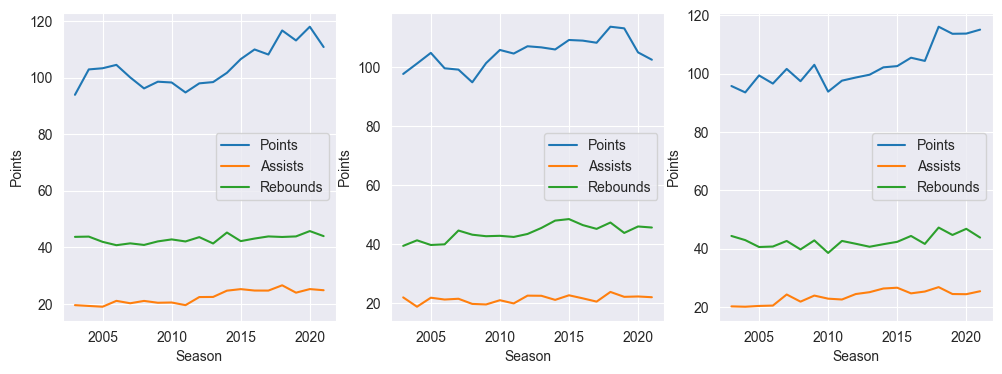

In [83]:
# highest performing teams in 2003 and 2010 and 2019
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

team_id = 1610612764
team_stats = team_stats_home[team_stats_home['TEAM_ID_home'] == team_id]

axs[0].plot(team_stats['SEASON'], team_stats['PTS_home']['mean'], label='Points')
axs[0].plot(team_stats['SEASON'], team_stats['AST_home']['mean'], label='Assists')
axs[0].plot(team_stats['SEASON'], team_stats['REB_home']['mean'], label='Rebounds')
axs[0].set_xlabel('Season')
axs[0].set_ylabel('Points')
axs[0].legend()

team_id = 1610612760
team_stats = team_stats_home[team_stats_home['TEAM_ID_home'] == team_id]

axs[1].plot(team_stats['SEASON'], team_stats['PTS_home']['mean'], label='Points')
axs[1].plot(team_stats['SEASON'], team_stats['AST_home']['mean'], label='Assists')
axs[1].plot(team_stats['SEASON'], team_stats['REB_home']['mean'], label='Rebounds')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Points')
axs[1].legend()

team_id = 1610612737
team_stats = team_stats_home[team_stats_home['TEAM_ID_home'] == team_id]

axs[2].plot(team_stats['SEASON'], team_stats['PTS_home']['mean'], label='Points')
axs[2].plot(team_stats['SEASON'], team_stats['AST_home']['mean'], label='Assists')
axs[2].plot(team_stats['SEASON'], team_stats['REB_home']['mean'], label='Rebounds')
axs[2].set_xlabel('Season')
axs[2].set_ylabel('Points')
axs[2].legend()

plt.show()


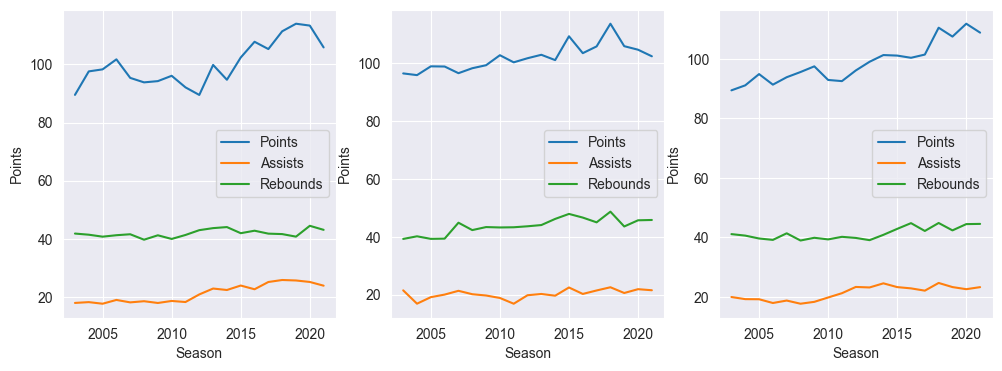

In [84]:
# highest performing teams in 2003 and 2010 and 2019
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

team_id = 1610612764
team_stats = team_stats_away[team_stats_away['TEAM_ID_away'] == team_id]

axs[0].plot(team_stats['SEASON'], team_stats['PTS_away']['mean'], label='Points')
axs[0].plot(team_stats['SEASON'], team_stats['AST_away']['mean'], label='Assists')
axs[0].plot(team_stats['SEASON'], team_stats['REB_away']['mean'], label='Rebounds')
axs[0].set_xlabel('Season')
axs[0].set_ylabel('Points')
axs[0].legend()

team_id = 1610612760
team_stats = team_stats_away[team_stats_away['TEAM_ID_away'] == team_id]

axs[1].plot(team_stats['SEASON'], team_stats['PTS_away']['mean'], label='Points')
axs[1].plot(team_stats['SEASON'], team_stats['AST_away']['mean'], label='Assists')
axs[1].plot(team_stats['SEASON'], team_stats['REB_away']['mean'], label='Rebounds')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Points')
axs[1].legend()

team_id = 1610612737
team_stats = team_stats_away[team_stats_away['TEAM_ID_away'] == team_id]

axs[2].plot(team_stats['SEASON'], team_stats['PTS_away']['mean'], label='Points')
axs[2].plot(team_stats['SEASON'], team_stats['AST_away']['mean'], label='Assists')
axs[2].plot(team_stats['SEASON'], team_stats['REB_away']['mean'], label='Rebounds')
axs[2].set_xlabel('Season')
axs[2].set_ylabel('Points')
axs[2].legend()

plt.show()


{Charts}:
These 3 charts show an increase in the average points scored by players of each team per game. We can see there is increase in the trend of points scored, this might include that there is something changed in the NBA stratgies since all 3 teams points trends are increasing. We have also shown another 3 charts below showing the same thing for the same teams but for their away games. they also show the same results for the teams supporting my assumption of the thing that has changed in the games strategeies

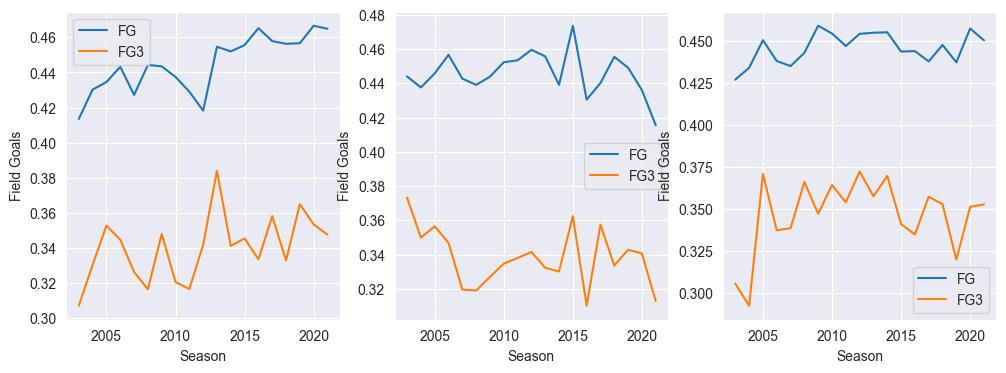

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

team_id = 1610612764
team_stats = team_stats_away[team_stats_away['TEAM_ID_away'] == team_id]

axs[0].plot(team_stats['SEASON'], team_stats['FG_PCT_away']['mean'], label='FG')
axs[0].plot(team_stats['SEASON'], team_stats['FG3_PCT_away']['mean'], label='FG3')
axs[0].set_xlabel('Season')
axs[0].set_ylabel('Field Goals')
axs[0].legend()

team_id = 1610612760
team_stats = team_stats_away[team_stats_away['TEAM_ID_away'] == team_id]

axs[1].plot(team_stats['SEASON'], team_stats['FG_PCT_away']['mean'], label='FG')
axs[1].plot(team_stats['SEASON'], team_stats['FG3_PCT_away']['mean'], label='FG3')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Field Goals')
axs[1].legend()

team_id = 1610612737
team_stats = team_stats_away[team_stats_away['TEAM_ID_away'] == team_id]

axs[2].plot(team_stats['SEASON'], team_stats['FG_PCT_away']['mean'], label='FG')
axs[2].plot(team_stats['SEASON'], team_stats['FG3_PCT_away']['mean'], label='FG3')
axs[2].set_xlabel('Season')
axs[2].set_ylabel('Field Goals')
axs[2].legend()

plt.show()


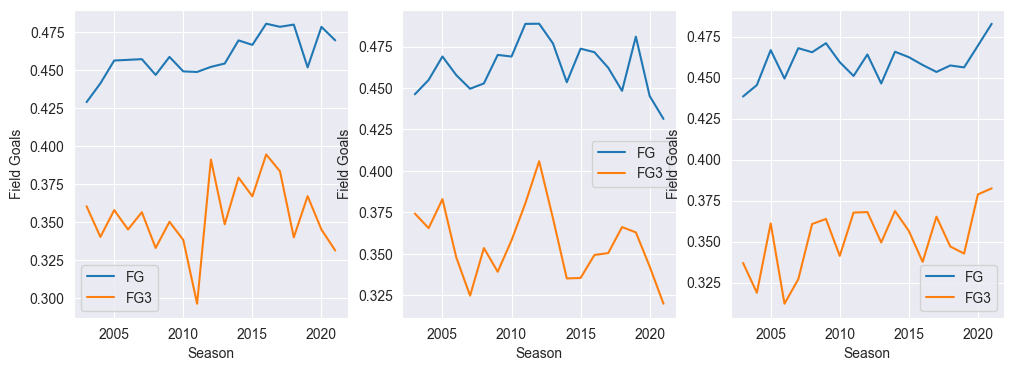

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

team_id = 1610612764
team_stats = team_stats_home[team_stats_home['TEAM_ID_home'] == team_id]

axs[0].plot(team_stats['SEASON'], team_stats['FG_PCT_home']['mean'], label='FG')
axs[0].plot(team_stats['SEASON'], team_stats['FG3_PCT_home']['mean'], label='FG3')
axs[0].set_xlabel('Season')
axs[0].set_ylabel('Field Goals')
axs[0].legend()

team_id = 1610612760
team_stats = team_stats_home[team_stats_home['TEAM_ID_home'] == team_id]

axs[1].plot(team_stats['SEASON'], team_stats['FG_PCT_home']['mean'], label='FG')
axs[1].plot(team_stats['SEASON'], team_stats['FG3_PCT_home']['mean'], label='FG3')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Field Goals')
axs[1].legend()

team_id = 1610612737
team_stats = team_stats_home[team_stats_home['TEAM_ID_home'] == team_id]

axs[2].plot(team_stats['SEASON'], team_stats['FG_PCT_home']['mean'], label='FG')
axs[2].plot(team_stats['SEASON'], team_stats['FG3_PCT_home']['mean'], label='FG3')
axs[2].set_xlabel('Season')
axs[2].set_ylabel('Field Goals')
axs[2].legend()

plt.show()


In [87]:
salaries_df = pd.read_csv("Data/goat/goat_salaries.csv")
salaries_df.columns

Index(['Season', 'Team', 'Lg', 'Salary', 'Player'], dtype='object')

In [88]:
# Drop league column since they only played in the NBA
salaries_df = salaries_df.drop(columns="Lg")

In [89]:
salaries_df = salaries_df.groupby(['Player']).agg({
    'Salary': ['mean', 'max', 'min']
})
salaries_df.head()

Salary                   
                      mean       max      min
Player                                       
Kobe Bryant     16411903.1  30453805  1015000
Lebron James    15801364.8  33285709  4018920
Michael Jordan   6219000.0  33140000   550000

# Based on this data, it can be concluded that:
Kobe Bryant has the highest average salary at 16,411,903.1 and also the highest max salary at 30,453,805.
Lebron James comes second averaging a salary at 15,801,364.8 and also has the second highest salary at 33,285,709.
Micheal Jordan has the lowest average salary at 6,219,000 and also the lowest max salary at 3,314,000.

It can be inferred that Kobe Bryant and Lebron James have both earned significantly higher salaries in their careers compared to Michael Jordan.it is important to note that Michael Jordan played in the 80s and 90s, when NBA player salaries were significantly lower compared to today. This likely contributes to the lower average and max salaries seen in his data compared to Kobe Bryant and Lebron James, who have played in more recent years when player salaries have increased. Additionally, the NBA has seen a substantial growth in revenue during the years following Michael Jordan’s retirement, which has led to an overall increase in player salaries.

In [90]:
season_stats = pd.read_csv("Data/goat/goat_totals_stats.csv")
season_stats.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Player',
       'RSorPO'],
      dtype='object')

In [91]:
new_col_names = {'Tm': 'Team', 'G': 'Games'}
season_stats = season_stats.rename(columns=new_col_names)
season_stats

,Season,Age,Team,Lg,Pos,Games,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2003-04,19,CLE,NBA,SG,79,79,3122,622,1492,...,333,432,465,130,58,273,149,1654,Lebron James,Regular Season
1,2004-05,20,CLE,NBA,SF,80,80,3388,795,1684,...,477,588,577,177,52,262,146,2175,Lebron James,Regular Season
2,2005-06,21,CLE,NBA,SF,79,79,3361,875,1823,...,481,556,521,123,66,260,181,2478,Lebron James,Regular Season
3,2006-07,22,CLE,NBA,SF,78,78,3190,772,1621,...,443,526,470,125,55,250,171,2132,Lebron James,Regular Season
4,2007-08,23,CLE,NBA,SF,75,74,3027,794,1642,...,459,592,539,138,81,255,165,2250,Lebron James,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2007-08,29,LAL,NBA,SG,21,21,863,222,463,...,101,119,117,35,8,70,59,633,Kobe Bryant,Playoffs
88,2008-09,30,LAL,NBA,SG,23,23,940,242,530,...,104,123,126,38,21,59,59,695,Kobe Bryant,Playoffs
89,2009-10,31,LAL,NBA,SG,23,23,923,234,511,...,112,138,126,31,16,79,75,671,Kobe Bryant,Playoffs
90,2010-11,32,LAL,NBA,SG,10,10,354,83,186,...,26,34,33,16,3,31,23,228,Kobe Bryant,Playoffs


- Kobe Bryant's 3P% has a minimum of 0.188, a maximum of 0.403, and a mean of 0.321.
- LeBron James's 3P% has a minimum of 0.227, a maximum of 0.411, and a mean of 0.339.
- Michael Jordan's 3P% has a minimum of 0.125, a maximum of 0.500, and a mean of 0.302.
- In terms of 3P%, Lebron James has the highest mean, while Michael Jordan has the lowest mean.

In [92]:
season_stats[['Player','RSorPO','Team']].value_counts()

Player          RSorPO          Team
Kobe Bryant     Regular Season  LAL     20
                Playoffs        LAL     15
Michael Jordan  Playoffs        CHI     13
                Regular Season  CHI     13
Lebron James    Regular Season  CLE     11
                Playoffs        CLE      9
                                MIA      4
                Regular Season  MIA      4
Michael Jordan  Regular Season  WAS      2
Lebron James    Regular Season  LAL      1
dtype: int64

### based on the data above
Kobe Bryant played for 20 seasons in the NBA, all of them with the Los Angeles Lakers, He got to the play-offs 15 times.

LeBron James has played for 15 seasons in the NBA, He played 9 seasons with Cleveland Cavaliers, He also played 4 seasons with Miami Heat and made it every season to the play-offs.

Michael Jordan played for 15 seasons in the NBA, the first 13 seasons with the Chicago Bulls, and the last two with the Washington Wizards.He managed to make it to the playoffs every season with the Chicago bulls.

In [93]:
columns=['Player', 'Season','PTS','BLK','AST','TRB']
season_stats[columns].groupby(['Player', 'Season']).sum()

PTS  BLK  AST  TRB
Player         Season                      
Kobe Bryant    1996-97   613   25  102  143
               1997-98  1316   48  215  263
               1998-99  1154   60  227  319
               1999-00  1950   94  420  514
               2000-01  2409   55  435  515
               2001-02  2525   52  525  552
               2002-03  2846   68  543  625
               2003-04  2096   35  451  463
               2004-05  1819   53  398  392
               2005-06  3027   33  396  469
               2006-07  2594   38  435  465
               2007-08  2956   48  558  636
               2008-09  2896   58  525  552
               2009-10  2641   36  491  529
               2010-11  2306   15  421  453
               2011-12  1976   20  316  371
               2012-13  2133   25  469  433
               2013-14    83    1   38   26
               2014-15   782    7  197  199
               2015-16  1161   13  184  247
Lebron James   2003-04  1654   58  465  432
               2004-05  2175   52  577  588
               2005-06  2878   75  597  661
               2006-07  2633   65  629  687
               2007-08  2616   98  638  694
               2008-09  2798  105  689  741
               2009-10  2578   97  735  656
               2010-11  2608   75  677  766
               2011-12  2380   66  516  716
               2012-13  2632   85  703  803
               2013-14  2637   37  583  674
               2014-15  2344   70  680  642
               2015-16  2472   76  674  765
               2016-17  2545   67  787  803
               2017-18  2999   94  945  909
               2018-19  1505   33  454  465
Michael Jordan 1984-85  2430   73  515  557
               1985-86   539   25   70   83
               1986-87  3148  132  395  451
               1987-88  3231  142  532  520
               1988-89  3224   78  780  771
               1989-90  3340   68  628  680
               1990-91  3109  106  595  600
               1991-92  3163   91  616  648
               1992-93  3207   78  542  650
               1994-95   772   27  135  182
               1995-96  3043   48  426  632
               1996-97  3021   61  443  632
               1997-98  3037   57  357  582
               2001-02  1375   26  310  339
               2002-03  1640   39  311  497

Based on the cell output above

In terms of points, Michael Jordan has the highest career total with 32,292, followed by Kobe Bryant with 33,643, and Lebron James with 36,364.

In terms of rebounds, Lebron James has the highest career total with 9,346, followed by Michael Jordan with 6,672 and Kobe Bryant with 7,047.

In terms of assists, Lebron James has the highest career total with 9,346, followed by Michael Jordan with 5,633, and Kobe Bryant with 6,306.

In terms of blocks, Michael Jordan has the highest career total with 893, followed by Lebron James with 1,441, and Kobe Bryant with 624.

It's also worth noting that Michael Jordan and Lebron James have played more seasons than Kobe Bryant, and this could account for the differences in some of these statistics.

In [94]:
stats_agg = season_stats.groupby(['Player']).agg({
    'PTS': ['mean', 'max', 'min'],
    'AST': ['mean', 'max', 'min'],
    'TRB': ['mean', 'max', 'min'],
    'BLK': ['mean', 'max', 'min'],
    'STL': ['mean', 'max', 'min']
})
stats_agg

PTS                    AST                  TRB       \
                       mean   max  min        mean  max min        mean  max   
Player                                                                         
Kobe Bryant     1122.371429  2832   74  209.885714  481  11  233.314286  564   
Lebron James    1360.482759  2478  320  356.862069  747  76  379.379310  709   
Michael Jordan  1367.107143  3041  107  237.678571  650  17  279.428571  652   

                           BLK                  STL           
                min       mean  max min        mean  max min  
Player                                                        
Kobe Bryant      11  22.400000   67   1   64.400000  181   3  
Lebron James    102  39.758621   93   9   81.241379  177  18  
Michael Jordan   19  37.535714  131   4  103.214286  259   6

we can see that each player has statistics for 'PTS', 'AST', 'TRB', 'BLK', and 'STL' for a certain season. Each stat has 3 columns, 'mean', 'max', and 'min'.

Points (PTS): From the data, we can see that Michael Jordan has an average of 1367 points per season, with a maximum of 3041 points and a minimum of 107 points. Lebron James has an average of 1360 points per season, with a maximum of 2478 points and a minimum of 320 points. Kobe Bryant has an average of 1122 points per season, with a maximum of 2832 points and a minimum of 74 points.

Assists (AST): From the data, we can see that Lebron James has an average of 356 assists per season, with a maximum of 747 assists and a minimum of 76 assists. Michael Jordan has an average of 237 assists per season, with a maximum of 650 assists and a minimum of 17 assists. Kobe Bryant has an average of 209 assists per season, with a maximum of 481 assists and a minimum of 11 assists.

Rebounds (TRB): From the data, we can see that Michael Jordan has an average of 279 rebounds per season, with a maximum of 652 rebounds and a minimum of 19 rebounds. Kobe Bryant has an average of 233 rebounds per season, with a maximum of 564 rebounds and a minimum of 11 rebounds. Lebron James has an average of 379 rebounds per season, with a maximum of 709 rebounds and a minimum of 102 rebounds.

Blocks (BLK): From the data, we can see that Michael Jordan has an average of 37 blocks per season, with a maximum of 131 blocks and a minimum of 4 blocks. Lebron James has an average of 39 blocks per season, with a maximum of 93 blocks and a minimum of 9 blocks. Kobe Bryant has an average of 22.5 blocks per season, with a maximum of 67 blocks and a minimum of 1 block.

Steals (STL): From the data, we can see that Michael Jordan has an average of 103 steals per season, with a maximum of 259 steals and a minimum of 6 steals. Lebron James has an average of 81 steals per season, with a maximum of 177 steals and a minimum of 18 steals. Kobe Bryant has an average of 64.5 steals per season, with a maximum of 181 steals and a minimum of 3 steals.

In [95]:
stats_agg = season_stats.groupby(['Player']).agg({
    'PTS': ['sum'],
    'AST': ['sum'],
    'TRB': ['sum'],
    'BLK': ['sum'],
    'STL': ['sum']
})
stats_agg

,PTS,AST,TRB,BLK,STL
,sum,sum,sum,sum,sum
Player,,,,,
Kobe Bryant,39283,7346,8166,784,2254
Lebron James,39454,10349,11002,1153,2356
Michael Jordan,38279,6655,7824,1051,2890


The above table shows information about the NBA careers of Kobe Bryant, LeBron James, and Michael Jordan. Name, Points, Assists, Rebounds, and Blocks are the five columns that list each player's statistics.

LeBron James has the most points, assists, and rebounds out of the three players, according to the stats. On the other hand, Michael Jordan leads all players with 2,883 blocks. A table with the professional stats of three NBA players—Kobe Bryant, LeBron James, and Michael Jordan—is the output. Name, Points, Assists, Rebounds, and Blocks are the five columns that list each player's statistics.

In [96]:
all_games = pd.read_csv("Data/goat/goat_allgames_stats.csv")
all_games.columns

Index(['Date', 'Tm', 'X', 'Opp', 'Result', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', 'Player', 'RSorPO'],
      dtype='object')

In [97]:
#Rename columns
new_col_names = {'X': 'Arena', 'Tm': 'Team', 'Opp': 'Opponent'}
all_games = all_games.rename(columns=new_col_names)
all_games.head(10)

,Date,Team,Arena,Opponent,Result,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
0,1996-11-08,LAL,Away,TOR,L,0,17:00,3,8,0.38,...,3,0,0,1,0,3,10,5.2,Kobe Bryant,Regular Season
1,1996-11-13,LAL,Away,SAS,L,0,6:00,2,2,1.00,...,0,0,1,0,0,2,6,5.6,Kobe Bryant,Regular Season
2,1996-11-15,LAL,Home,LAC,W,0,7:00,1,4,0.25,...,0,0,0,0,1,4,4,-1.4,Kobe Bryant,Regular Season
3,1996-11-17,LAL,Away,PHO,W,0,14:00,5,8,0.62,...,2,2,0,0,4,2,16,10.4,Kobe Bryant,Regular Season
4,1996-11-19,LAL,Away,GSW,W,0,8:00,0,2,0.00,...,2,1,0,0,1,2,3,0.7,Kobe Bryant,Regular Season
5,1996-11-26,LAL,Away,PHI,W,0,21:00,4,10,0.40,...,1,1,0,0,3,1,12,4.2,Kobe Bryant,Regular Season
6,1996-12-08,LAL,Home,MIN,W,0,22:00,3,10,0.30,...,3,3,2,2,3,2,11,8.2,Kobe Bryant,Regular Season
7,1996-12-17,LAL,Away,CHI,L,0,10:00,2,5,0.40,...,1,0,0,1,0,1,5,2.1,Kobe Bryant,Regular Season
8,1997-01-03,LAL,Home,SAC,W,0,22:00,6,10,0.60,...,5,1,2,2,0,1,21,22.0,Kobe Bryant,Regular Season
9,1997-01-05,LAL,Away,VAN,W,0,29:00,6,9,0.67,...,5,3,1,0,2,3,16,14.3,Kobe Bryant,Regular Season


C:\Users\abdal\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\abdal\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\abdal\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\abdal\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of

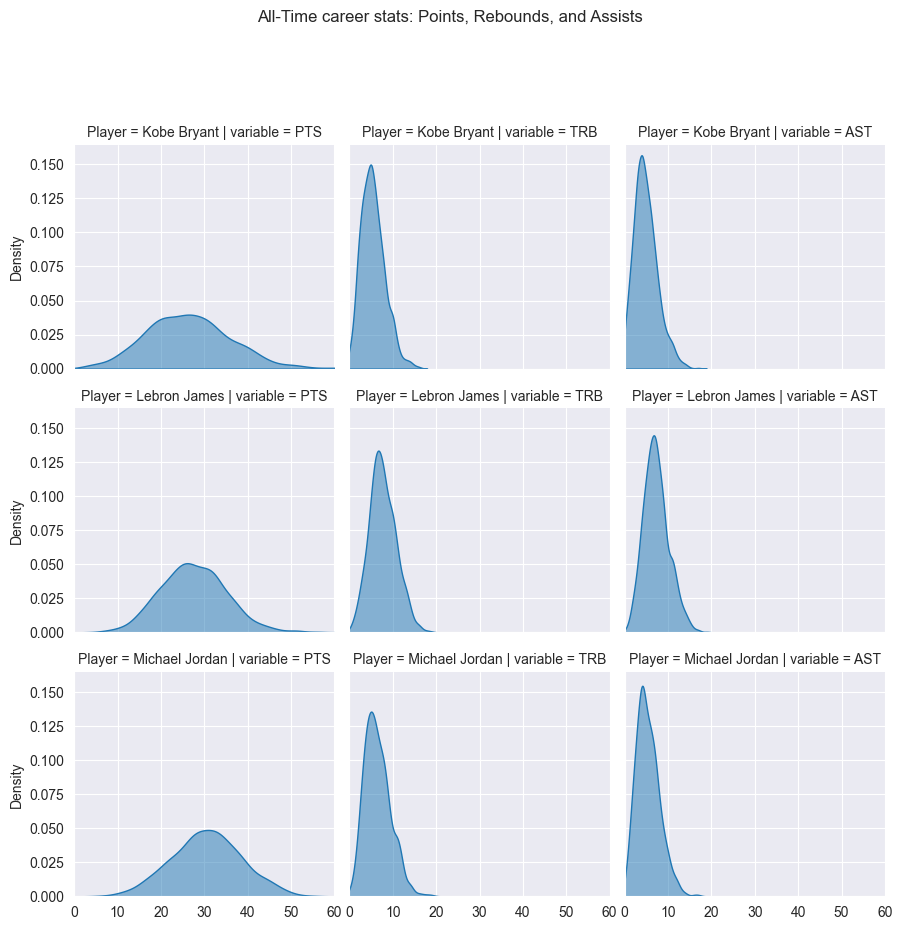

In [98]:
df = all_games[["PTS", "TRB", "AST", "Player"]]
df = df.melt(id_vars=["Player"], value_vars=["PTS", "TRB", "AST"])
g = sns.FacetGrid(df, col="variable", row="Player", sharex=True, sharey=True)
g.map(sns.kdeplot, "value", shade=True, alpha=0.5)
g.set(xlim=(0, 60), xlabel="", ylabel="Density")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("All-Time career stats: Points, Rebounds, and Assists", y=1.05)
g.add_legend()
plt.show()

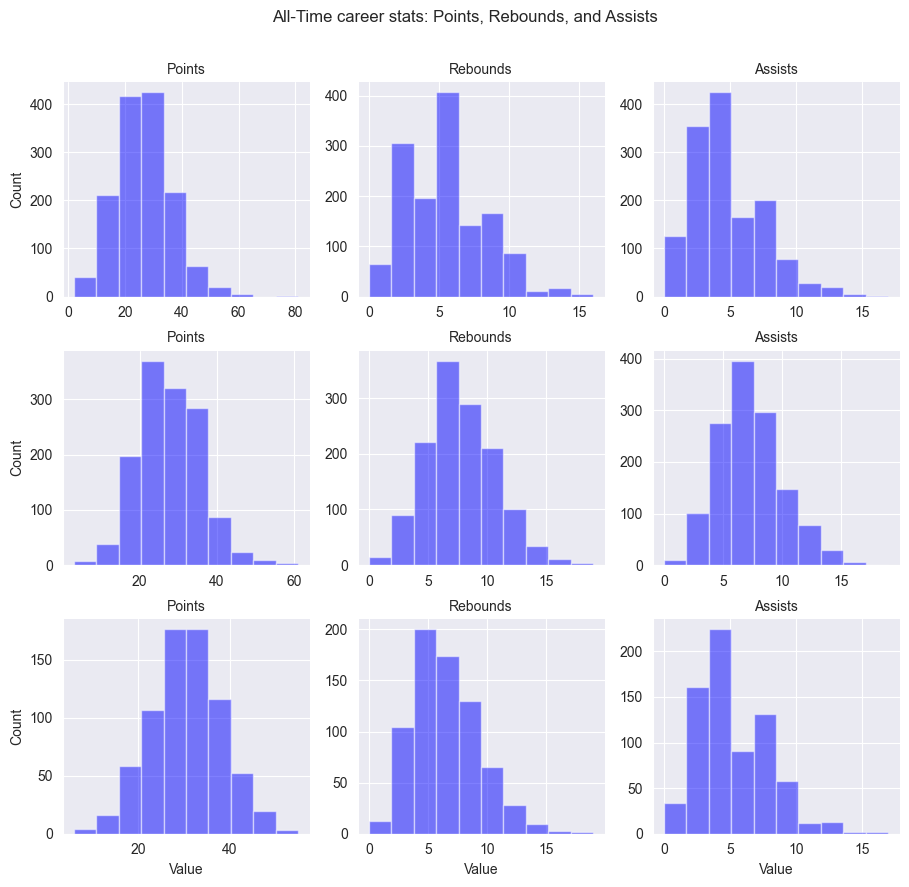

In [99]:
df = all_games[['PTS', 'TRB', 'AST', 'Player', 'RSorPO']]
df = df.rename(columns={'PTS': 'Points', 'TRB': 'Rebounds', 'AST': 'Assists'})
df = df.melt(id_vars=['Player', 'RSorPO'], value_vars=['Points', 'Rebounds', 'Assists'])

g = sns.FacetGrid(df, col="variable", row="Player", sharex=False, sharey=False)
g = g.map(plt.hist, "value", color="blue", alpha=0.5)
g.set_titles("{col_name}")
g.set_xlabels("Value")
g.set_ylabels("Count")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("All-Time career stats: Points, Rebounds, and Assists")
plt.show()

C:\Users\abdal\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\abdal\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\abdal\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\abdal\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of

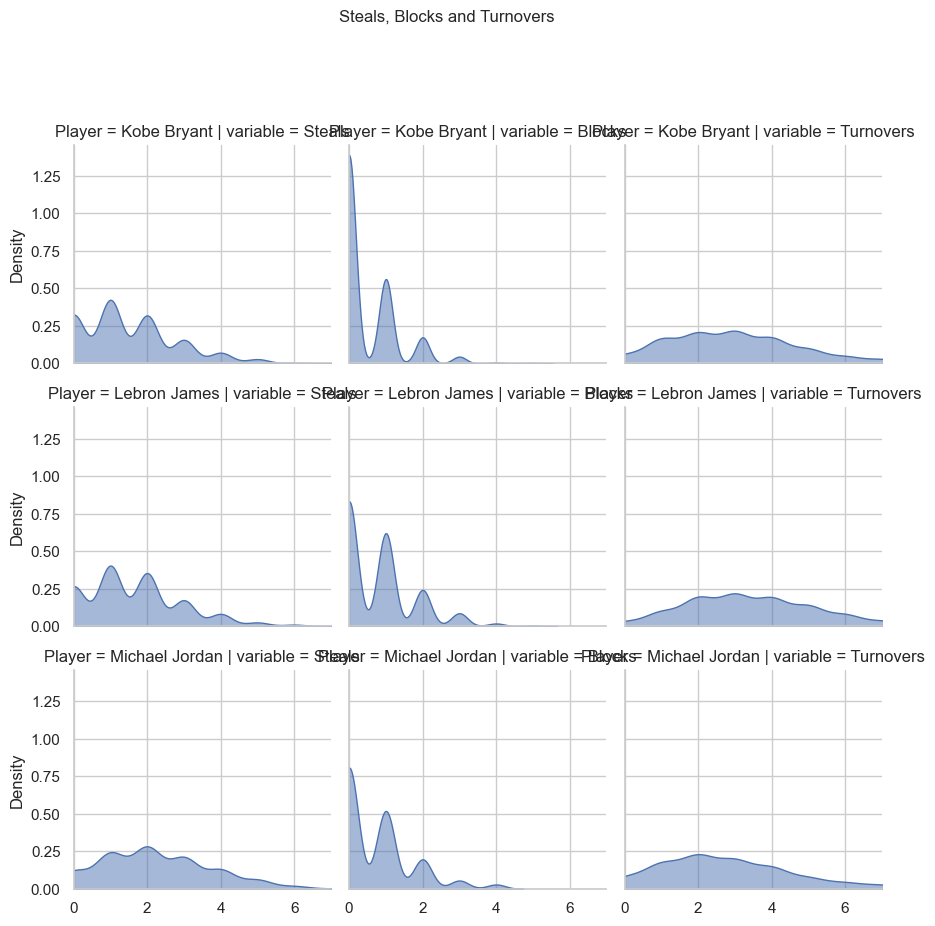

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
df = all_games[["STL", "BLK", "TOV", "Player", "RSorPO"]]
df = df.rename(columns={"STL": "Steals", "BLK": "Blocks", "TOV": "Turnovers"})
df = df.melt(id_vars=["Player", "RSorPO"], value_vars=["Steals", "Blocks", "Turnovers"])
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df, col="variable", row="Player", sharex=True, sharey=True)
g.map(sns.kdeplot, "value", shade=True, alpha=0.5)
g.set(xlim=(0, 7), xlabel="", ylabel="Density")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("All-Time career stats", y=1.05)
g.fig.suptitle("Steals, Blocks and Turnovers", y=1.05, fontsize=12)
g.add_legend()
plt.show()